In [1]:
import matplotlib.pyplot as py
import pandas as pd
import numpy as np

In [2]:
def sigmoid(x):
    sigmoid = (1/(1+np.exp(-x)))
    return sigmoid

In [3]:
loc = input("Enter position of training file in ur pc with double backslash, for default location type \"1\": ")
if (loc == "1"):
    loc = "train (1).csv"
data = pd.read_csv(loc)

Enter position of training file in ur pc with double backslash, for default location type "1":  1


In [4]:
loc2 = input("Enter position of testing file in ur pc with double backslash, for default location type \"1\": ")
if (loc2 == "1"):
    loc2 = "test(1).csv"
data3 = pd.read_csv(loc2)

Enter position of testing file in ur pc with double backslash, for default location type "1":  1


In [5]:
data= data.drop(['Name'],axis=1)
data3 = data3.drop(['Name'],axis=1)

In [6]:
data = data.replace({"male":0,"female":1})
data3 = data3.replace({"male":0,"female":1})

In [7]:
mean = data.mean()
max = data.max()
min = data.min()
data2 = (data - data.mean())/(data.max()-data.min())

In [8]:
features = data2.iloc[:,1:].values
target = data.iloc[:,0].values

In [9]:
data4 = (data3-mean)/(max-min)
features2 = data4.iloc[:,1:].values
target2 = data3.iloc[:,0].values

In [34]:
w = np.zeros(len(features[0]))
b =0

In [35]:
epochs = 200000
L=0.007
epochlist = np.arange(epochs)
costlist = np.zeros(epochs)
cost2list=np.zeros(epochs)
accuracylist=np.zeros(epochs)

In [36]:
i=0
while(i<epochs):
    prediction = sigmoid(np.dot(features,w)+b)
    dw = (np.dot(features.T, prediction-target))/len(target)
    db = (np.sum(prediction-target))/len(target)
    w = w-L*dw
    b = b - L*db
    prediction2 = sigmoid(np.dot(features2,w)+b)
    cost = -(np.dot(target,np.log(prediction+1e-9)+np.dot(1-target,np.log(1-prediction+1e-9))))
    cost2 = -(np.dot(target2,np.log(prediction2+1e-9)+np.dot(1-target2,np.log(1-prediction2+1e-9))))
    predictionlist =[]
    for j in range(len(prediction2)):
        if (prediction2[j]>=0.5):
            predictionlist.append(1)
        else:
            predictionlist.append(0)
    accuracy = (np.sum(predictionlist==target2)*100)/len(target2)
    costlist[i] = cost
    cost2list[i] =cost2
    accuracylist[i]=accuracy
    epochlist[i]=i
    i = i+1

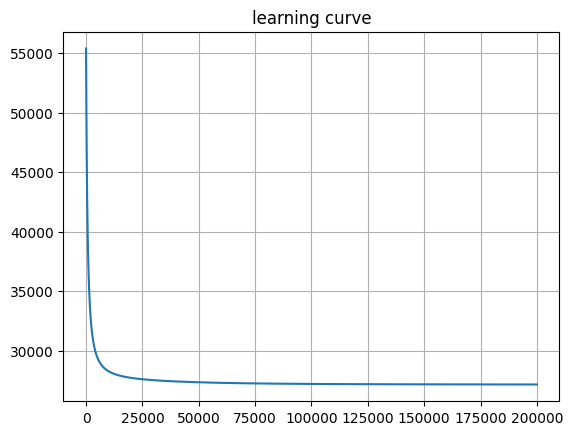

In [37]:
py.plot(epochlist,costlist)
py.title("learning curve")
py.grid()
py.show()

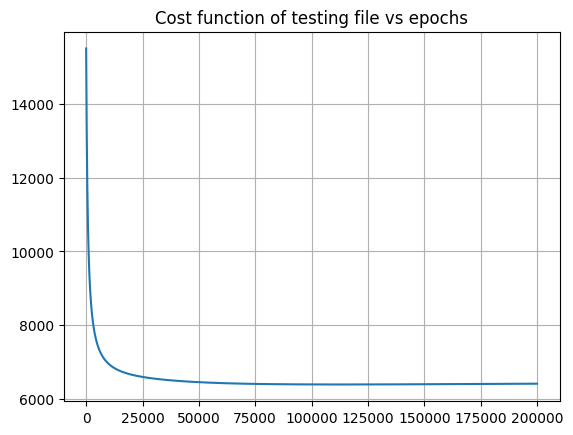

In [38]:
py.plot(epochlist,cost2list)
py.title("Cost function of testing file vs epochs")
py.grid()
py.show()

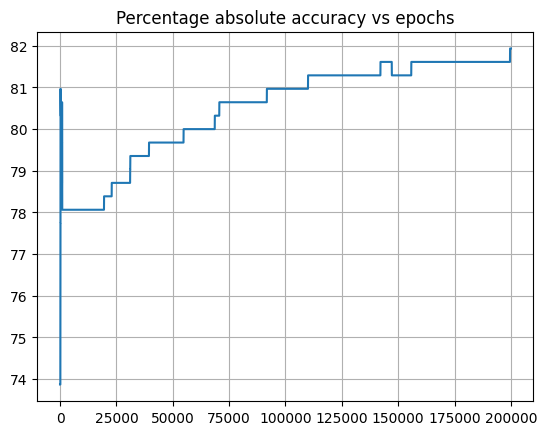

In [39]:
py.plot(epochlist,accuracylist)
py.title("Percentage accuracy vs epochs")
py.grid()
py.show()

In [40]:
print("Final Accuracy: ", accuracy)

Final Accuracy:  81.93548387096774
